# Import Libraraies

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Looking At the Data

In [70]:
data = pd.read_csv('data.csv')
data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [71]:
data = data.drop(columns=['ReasonsForLack'], axis=1)

In [72]:
values = {}

print('Unique Values for Columns \n')
for column in data.columns.values:
    values[column] = list(data[column].unique())
    print(f'{column}: {data[column].unique()} \n')
    

Unique Values for Columns 

EducationSector: ['Engineering Sciences' 'Others'
 'Economic Sciences, Business Studies, Commerce and Law'
 'Art, Music or Design' 'Humanities and Social Sciences'
 'Medicine, Health Sciences' 'Teaching Degree (e.g., B.Ed)'
 'Mathematics or Natural Sciences' 'Language and Cultural Studies'] 

IndividualProject: ['No' 'Yes'] 

Age: [19 22 18 20 17 21 23 26 24 25] 

Gender: ['Male' 'Female'] 

City: ['Yes' 'No'] 

Influenced: ['No' 'Yes'] 

Perseverance: [2 3 4 1 5] 

DesireToTakeInitiative: [2 3 4 1 5] 

Competitiveness: [3 4 2 5 1] 

SelfReliance: [3 4 1 2 5] 

StrongNeedToAchieve: [2 4 3 5 1] 

SelfConfidence: [2 3 4 1 5] 

GoodPhysicalHealth: [3 4 2 1 5] 

MentalDisorder: ['Yes' 'No'] 

KeyTraits: ['Passion' 'Vision' 'Resilience' 'Positivity' 'Work Ethic'] 

y: [1 0] 



# Data Preprocessing

Now that we have loded the data we need to modify it 

- Add a filed called no_of_degrees which is the number of degrees a student is pursuing
- Add a filed called is_stem which tells whether a student has taken a science degree or not
- Lable encode the following columns: IndividualProject, Gender, City, Influenced, MentalDisorder
- Onehot encode the following columns: KeyTraits

In [73]:
# 1) Add a filed called no_of_degrees which is the number of degrees a student is pursuing

# the 'EducationSector' column as degrees split by commas, so we would split the string value
# and count the length of that list. The length is the number of degrees. 
data['no_of_degrees'] = data['EducationSector'].apply(lambda val: len(val.split(',')))

data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y,no_of_degrees
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,1,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,0,1
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,0,1
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,0,1
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,1,1


In [74]:
# 2) Add a filed called is_stem which tells whether a student has taken a science degree or not
data['is_stem'] = data['EducationSector'].apply(lambda val: 1 if 'Sciences' in val else 0)

data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y,no_of_degrees,is_stem
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,1,1,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,0,1,1
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,0,1,1
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,0,1,1
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,1,1,1


In [75]:
# 3) Lable encode the following columns: IndividualProject, Gender, City, Influenced, MentalDisorder
columns_to_lable = ['IndividualProject', 'Gender', 'City', 'Influenced', 'MentalDisorder']

for column in columns_to_lable:
    data[column] = data[column].apply(lambda val: values[column].index(val))

data.head()    

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y,no_of_degrees,is_stem
0,Engineering Sciences,0,19,0,0,0,2,2,3,3,2,2,3,0,Passion,1,1,1
1,Engineering Sciences,1,22,0,1,1,3,3,3,4,4,3,4,0,Vision,0,1,1
2,Engineering Sciences,0,18,0,0,0,3,4,3,3,3,4,4,1,Passion,0,1,1
3,Engineering Sciences,1,20,0,0,1,3,3,3,3,4,3,3,1,Resilience,0,1,1
4,Engineering Sciences,1,19,0,0,1,2,3,3,3,4,3,2,0,Vision,1,1,1


# Analysis 1 : Is there a difference in the mental and physical health of people who may or may not become entrepreneurs? 

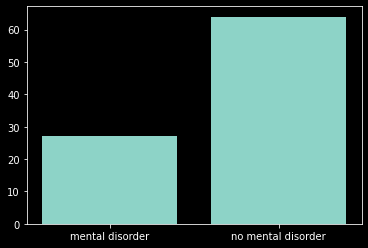

In [119]:
counts = data[data['y'] == 1].groupby(['MentalDisorder']).count()['y']


plt.bar(['mental disorder', 'no mental disorder'], [counts[0], counts[1]])

plt.xlabel = 'has mental disorder or not'
plt.ylabel = 'number of students who might become entreprenures'

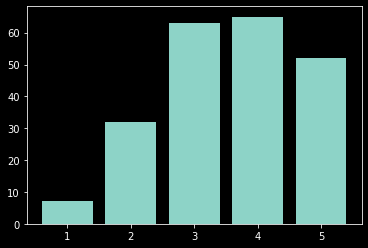

In [120]:
counts = data.groupby(['GoodPhysicalHealth']).count()['y']

plt.bar(['1', '2', '3', '4', '5'], [counts[1], counts[2], counts[3], counts[4], counts[5]])

plt.xlabel = 'rating from worst to best physical health'
plt.ylabel = 'number of students who might become entreprenures'